In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle
import json
from copy import deepcopy
import pandas as pd
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../../')
from scipy.sparse.linalg import lsqr
from style import style_setup

os.system('python ../style/style_setup.py')

0

In [2]:
common_path = '/Users/tolmach/Documents/GitHub/latent_circuit_inference/data/inferred_LCs/relu_vs_tanh_dataset/CDDMtanh'

In [4]:
RNNs_tanh_folders = os.listdir(common_path)
if ".DS_Store" in RNNs_tanh_folders:
    RNNs_tanh_folders.remove(".DS_Store")

In [37]:
RNNs_tanh_folders[0]
subfolders = os.path.join(common_path, RNNs_tanh_folders[0], "6_nodes")
LCs = os.listdir(subfolders)
scores_sum = []
scores1 = []
scores2 = []
for LC in LCs:
    score1 = float(LC.split("_")[0])
    score2 = float(LC.split("_")[1])
    scores_sum.append(score1 + score2)
    scores1.append(score1)
    scores2.append(score2)
i = scores_sum.index(max(scores_sum))
LC_best = LCs[i]
score1_best = scores1[i]
score2_best = scores2[i]

LC_data = json.load(open(os.path.join(subfolders, LC_best, f"{score1_best}_{score2_best}_LC_params.json"), 'rb+'))
U = np.array(LC_data["U"])
q = np.array(LC_data["q"])
Q = U.T @ q
W_rec = np.array(LC_data["W_rec"])

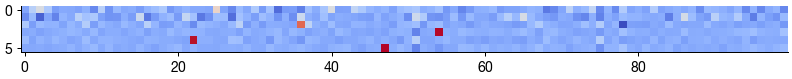

In [36]:
plt.imshow(Q.T, cmap = 'coolwarm')

<StemContainer object of 3 artists>

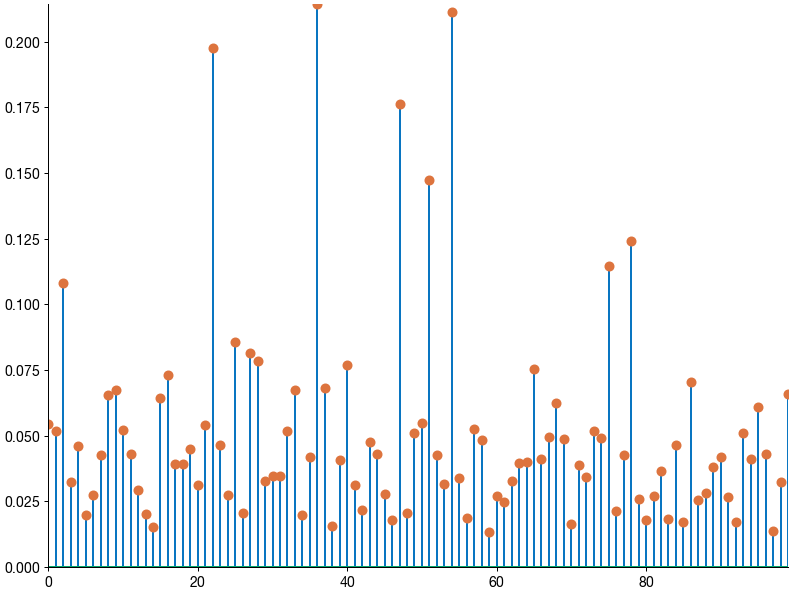

In [41]:
plt.stem(np.mean(np.abs(Q.T), axis = 0))

Can I remove the useless neurons?

In [44]:
dataseries = np.mean(np.abs(Q.T), axis = 0)
dataseries = np.sort(dataseries)

<StemContainer object of 3 artists>

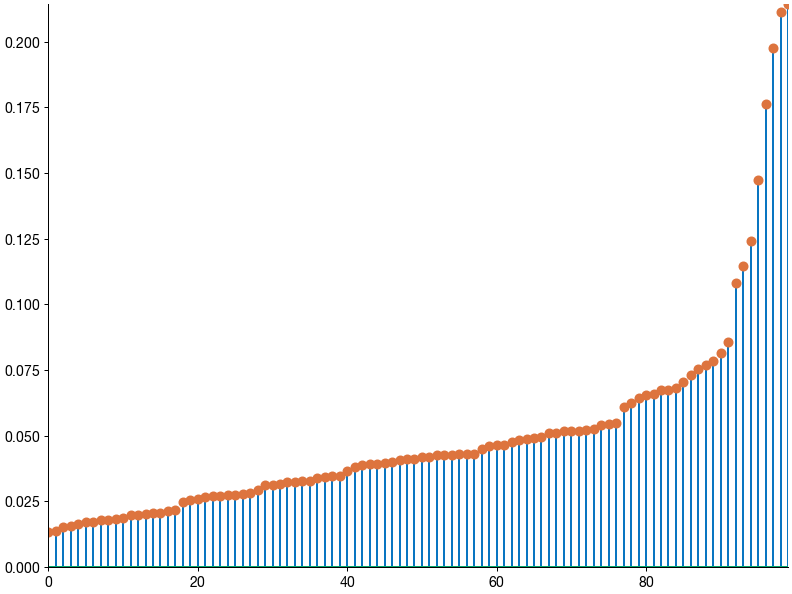

In [45]:
plt.stem(dataseries)